<a href="https://colab.research.google.com/github/muhamadrido21/Latihan-SKLearn-SVM-untuk-Klasifikasi-penyakit-Diabetes/blob/main/TUGAS_Kecerdasan_Komputasional_dan_Pembelajaran_Mesin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Load dataset MNIST
(x_train, y_train), (x_validation, y_validation) = keras.datasets.mnist.load_data()

# Sampling Train 8000 dan Validasi 2000, ambil 1 data untuk testing nantinya
x_train = x_train[:800]
y_train = y_train[:800]
x_validation = x_validation[:200]
y_validation = y_validation[:200]

x_test = x_train[-1]
y_test = y_train[-1]

viz_test = x_test

# Normalisasi 0-255 menjadi 0-1
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Reshape data dari (28, 28) menjadi (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_validation = np.expand_dims(x_validation, -1)

# One-hot encode label
y_train = keras.utils.to_categorical(y_train, 10)
y_validation = keras.utils.to_categorical(y_validation, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# First Model Setup and Training (original from cell O_zoArarCXub)
model = keras.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

sgd = keras.optimizers.SGD(
  learning_rate=0.01,
)

model.compile(
  loss="categorical_crossentropy",
  optimizer=sgd,
  metrics=["accuracy"]
)

history = model.fit(
  x = x_train,
  y = y_train,
  epochs = 50,
  batch_size = 128,
  validation_data=(x_validation, y_validation)
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.0978 - loss: 2.3052 - val_accuracy: 0.1450 - val_loss: 2.2891
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1523 - loss: 2.2781 - val_accuracy: 0.2250 - val_loss: 2.2718
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1959 - loss: 2.2623 - val_accuracy: 0.2650 - val_loss: 2.2558
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3045 - loss: 2.2337 - val_accuracy: 0.3100 - val_loss: 2.2391
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3183 - loss: 2.2158 - val_accuracy: 0.3350 - val_loss: 2.2197
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3187 - loss: 2.1911 - val_accuracy: 0.3500 - val_loss: 2.1982
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3613 - loss: 2.1582 - val_accuracy: 0.3650 - val_loss: 2.1747
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3905 - loss: 2.1351 - val_accuracy: 0.3850 - val_loss: 2.1473


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │       108,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,710 (424.65 KB)

 Trainable params: 108,710 (424.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.0870 - loss: 2.2952 - val_accuracy: 0.1050 - val_loss: 2.3006
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0805 - loss: 2.2948 - val_accuracy: 0.1100 - val_loss: 2.2993
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0971 - loss: 2.2927 - val_accuracy: 0.1150 - val_loss: 2.2981
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0945 - loss: 2.2933 - val_accuracy: 0.1200 - val_loss: 2.2969
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0869 - loss: 2.2891 - val_accuracy: 0.1200 - val_loss: 2.2958
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0966 - loss: 2.2900 - val_accuracy: 0.1200 - val_loss: 2.2946
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.0897 - loss: 2.2888 - val_accuracy: 0.1300 - val_loss: 2.2933
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1084 - loss: 2.2871 - val_accuracy: 0.1300 - val_loss: 2.2922

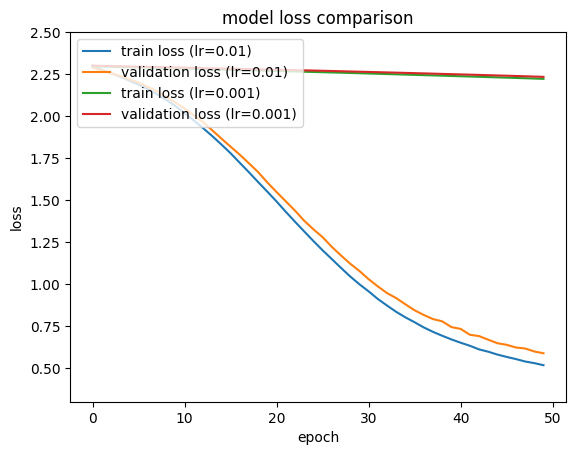

In [8]:
from tensorflow import keras
import matplotlib.pyplot as plt

model2 = keras.Sequential()
model2.add(keras.Input(shape=(28, 28, 1)))
model2.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(20, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax")) #10 sesuai jumlah kelas, output one-hot encode

model2.summary()

sgd2 = keras.optimizers.SGD(
  learning_rate=0.001,
)

# compile model
model2.compile(
  loss="categorical_crossentropy",
  optimizer=sgd2,
  metrics=["accuracy"]
)

# latih model
history2 = model2.fit(
  x = x_train,
  y = y_train,
  epochs = 50,
  batch_size = 128,
  validation_data=(x_validation, y_validation)
)

# plot loss
plt.plot(history.history['loss'], label='train loss (lr=0.01)')
plt.plot(history.history['val_loss'], label='validation loss (lr=0.01)')
plt.plot(history2.history['loss'], label='train loss (lr=0.001)')
plt.plot(history2.history['val_loss'], label='validation loss (lr=0.001)')
plt.title('model loss comparison')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.ylim(ymax=2.5, ymin=0.3)
plt.show()

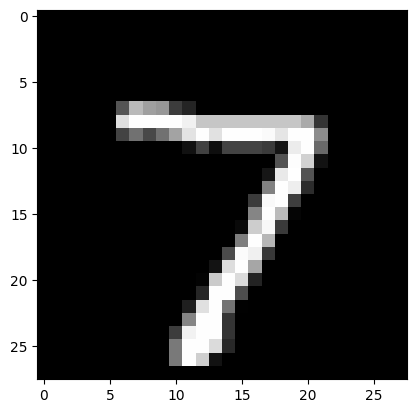

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
image terdeteksi sebagai angka  7


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

# Load a fresh single image for plotting and prediction to ensure independence
(_, _), (x_original_test_full, _) = keras.datasets.mnist.load_data()
viz_test_local = x_original_test_full[0] # Use the first image from the original test set as an example

plt.imshow(viz_test_local, cmap=plt.get_cmap('gray'))
plt.show()

# Prepare x_test for prediction for model2
x_test_for_model2 = viz_test_local.astype("float32") / 255
x_test_for_model2 = np.expand_dims(x_test_for_model2, -1)
x_test_for_model2 = np.expand_dims(x_test_for_model2, axis=0) # Add batch dimension

result = model2.predict(x_test_for_model2)
result = np.argmax(result, axis = 1)
print("image terdeteksi sebagai angka ",result[0])